
#  PEA04   Estimated Population by age_group, Sex, Region, Age and Year (2011-2023)


[Central Statistics Office in Ireland  population of Ireland,](https://data.cso.ie/product/pme)

| Code   | Description               | Status |
| ------ | ------------------------- | ------ |
| PEA01  | Population Estimates      | EDAed       |
| PEA03  | Flow                      |        |
| PEA04  | Region                    |EDAed        |
| PEA11  | Single                    |        |
| PEA15  | Component                 | EDAed       |
| PEA18  | Origin/Destination        |        |
| PEA23  | Citizenship Emigration    |        |
| PEA24  | Citizenship Immigration   |        |
| PEA25  | Citizenship Population    |        |

<img src="../images/PEA01.png" alt="Example Image" width="600"/>






## Loading Data  and Libraries 



In [26]:
import pandas as pd
import altair as alt
# Enable the VegaFusion data transformer
alt.data_transformers.enable('vegafusion')
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
# Suppress all warnings
warnings.filterwarnings('ignore')

%matplotlib inline


In [27]:
# Load the dataset
df = pd.read_csv('../raw/PEA04.csv')


## Exploratory Data Analysis
Exploring the basic structure, descriptive statistics, and dealing with missing values.


In [28]:
df.head() # Note examples of missing population data in the 4th and 5th row

,STATISTIC Label,Year,Age Group,Sex,Region,UNIT,VALUE
0,Estimated Population (Persons in April),2011,0 - 4 years,Both sexes,State,Thousand,356.0
1,Estimated Population (Persons in April),2011,0 - 4 years,Both sexes,Border,Thousand,30.7
2,Estimated Population (Persons in April),2011,0 - 4 years,Both sexes,West,Thousand,32.6
3,Estimated Population (Persons in April),2011,0 - 4 years,Both sexes,Mid-West,Thousand,35.0
4,Estimated Population (Persons in April),2011,0 - 4 years,Both sexes,South-East,Thousand,32.0


In [29]:
df.columns

Index(['STATISTIC Label', 'Year', 'Age Group', 'Sex', 'Region', 'UNIT',
       'VALUE'],
      dtype='object')

In [30]:
df.nunique()

STATISTIC Label       1
Year                 13
Age Group            19
Sex                   3
Region                9
UNIT                  1
VALUE              1575
dtype: int64

In [25]:
# Unique values in non-numeric columns
{col: df[col].unique() for col in df.select_dtypes(include='object').columns}

{'STATISTIC': array(['PEA04'], dtype=object),
 'STATISTIC Label': array(['Estimated Population (Persons in April)'], dtype=object),
 'C02076V02508': array(['205', '245', '265', '300', '365', '410', '440', '460', '475',
        '495', '515', '530', '550', '565', '580', '595', '610', '630', '-'],
       dtype=object),
 'Age Group': array(['0 - 4 years', '5 - 9 years', '10 - 14 years', '15 - 19 years',
        '20 - 24 years', '25 - 29 years', '30 - 34 years', '35 - 39 years',
        '40 - 44 years', '45 - 49 years', '50 - 54 years', '55 - 59 years',
        '60 - 64 years', '65 - 69 years', '70 - 74 years', '75 - 79 years',
        '80 - 84 years', '85 years and over', 'All ages'], dtype=object),
 'C02199V02655': array(['-', '1', '2'], dtype=object),
 'Sex': array(['Both sexes', 'Male', 'Female'], dtype=object),
 'C02196V04140': array(['-', 'B1A65D7C-1984-4A87-AD58-0E846812C992',
        'A69CA800-8D87-4920-A7C1-50426A1D39B4',
        '42C5C2A5-2D71-4BD1-BDB5-BD7D3198CD78',
        '27C

In [31]:
# Check if the columns  exist in the DataFrame
columns_to_drop = [col for col in ['STATISTIC', 'UNIT'] if col in df.columns]

# Drop them if they exist
if columns_to_drop:
    df = df.drop(columns_to_drop, axis=1)
# Show remaining columns    
df.columns 

Index(['STATISTIC Label', 'Year', 'Age Group', 'Sex', 'Region', 'VALUE'], dtype='object')

In [32]:
# Renaming the columns to lowercase snake case with Python's string manipulation function rename
df = df.rename(columns={
    'STATISTIC Label': 'statistic_label',
    'Year': 'year',
    'Age Group': 'age_group',
    'Sex': 'sex',
    'Region': 'region',
    'VALUE': 'value'
})


df.head()

,statistic_label,year,age_group,sex,region,value
0,Estimated Population (Persons in April),2011,0 - 4 years,Both sexes,State,356.0
1,Estimated Population (Persons in April),2011,0 - 4 years,Both sexes,Border,30.7
2,Estimated Population (Persons in April),2011,0 - 4 years,Both sexes,West,32.6
3,Estimated Population (Persons in April),2011,0 - 4 years,Both sexes,Mid-West,35.0
4,Estimated Population (Persons in April),2011,0 - 4 years,Both sexes,South-East,32.0


In [33]:
# Save the reformatted DataFrame to CSV
df.to_csv('../data/01_region_reformat.csv', index=False)


  ### Checking for duplication

In [34]:
# 
duplicates = df.duplicated()

# To see if there are any duplicates
any_duplicates = duplicates.any()

# Print result
print("DataFrame df contains duplicates is", any_duplicates)


DataFrame df contains duplicates is False


In [35]:
df.isna().sum()

statistic_label    0
year               0
age_group          0
sex                0
region             0
value              0
dtype: int64

In [37]:
# Unique values in non-numeric columns
{col: df[col].unique() for col in df.select_dtypes(include='object').columns}

{'statistic_label': array(['Estimated Population (Persons in April)'], dtype=object),
 'age_group': array(['0 - 4 years', '5 - 9 years', '10 - 14 years', '15 - 19 years',
        '20 - 24 years', '25 - 29 years', '30 - 34 years', '35 - 39 years',
        '40 - 44 years', '45 - 49 years', '50 - 54 years', '55 - 59 years',
        '60 - 64 years', '65 - 69 years', '70 - 74 years', '75 - 79 years',
        '80 - 84 years', '85 years and over', 'All ages'], dtype=object),
 'sex': array(['Both sexes', 'Male', 'Female'], dtype=object),
 'region': array(['State', 'Border', 'West', 'Mid-West', 'South-East', 'South-West',
        'Dublin', 'Mid-East', 'Midland'], dtype=object)}

### Visualise overlapping age_group kvalues

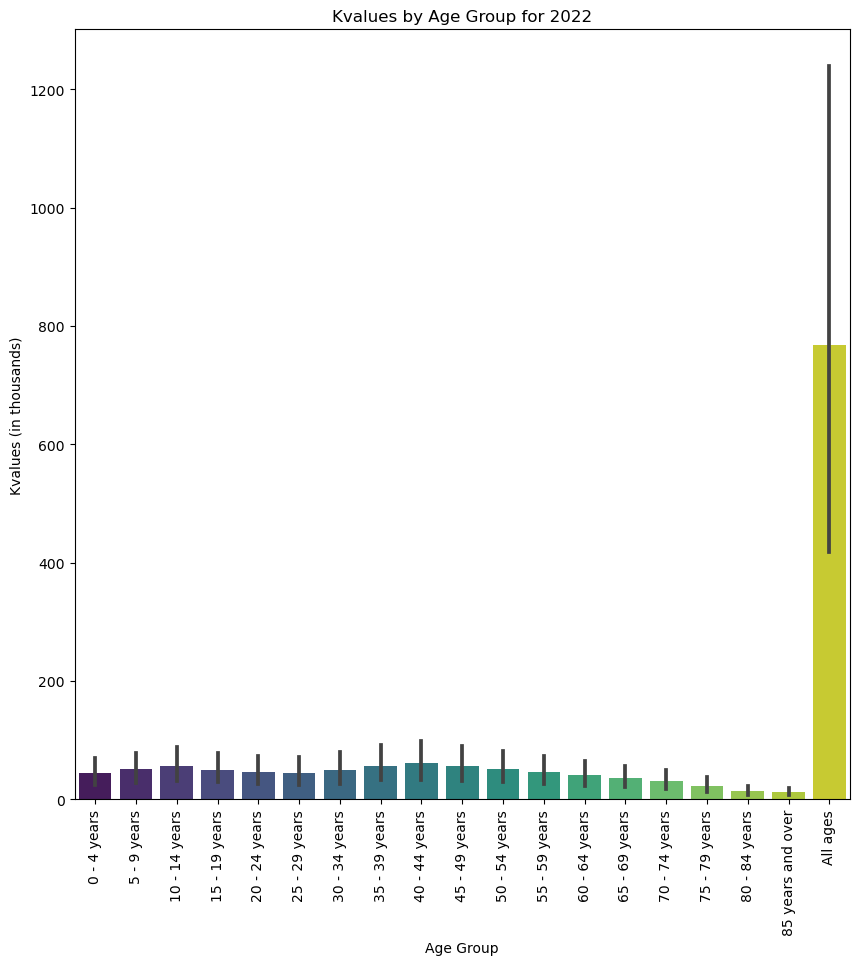

In [40]:


# Filter the DataFrame for the year 2022
df_2022 = df[df['year'] == 2022]

# Plotting the kvalues for each age_group in 2022
plt.figure(figsize=(10, 10))  # Adjust the width and height as needed
sns.barplot(data=df_2022, x='age_group', y='value', palette='viridis')

# Add title and labels
plt.title('Kvalues by Age Group for 2022')
plt.xlabel('Age Group')
plt.ylabel('Kvalues (in thousands)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Save the plot 
plt.savefig('../images/04_pop_overlap')

# Show the plot
plt.show()


In [22]:
# Dropping the feeder  rows where 'Age Group' is 'Under 1 year' or '1 - 4 years'
df = df[~df['age_group'].isin(['Under 1 year', '1 - 4 years'])]
df['age_group'].unique()

array(['0 - 4 years', '0 - 14 years', '5 - 9 years', '10 - 14 years',
       '15 - 19 years', '15 - 24 years', '15 years and over',
       '20 - 24 years', '25 - 29 years', '25 - 44 years', '30 - 34 years',
       '35 - 39 years', '40 - 44 years', '45 - 49 years', '45 - 64 years',
       '50 - 54 years', '55 - 59 years', '60 - 64 years', '65 - 69 years',
       '65 years and over', '70 - 74 years', '75 - 79 years',
       '80 - 84 years', '85 years and over', 'All ages'], dtype=object)

In [23]:
df.head()

,year,age_group,gender,kvalue
3,1950,0 - 4 years,Both sexes,310.2
4,1950,0 - 4 years,Male,158.9
5,1950,0 - 4 years,Female,151.3
6,1950,0 - 14 years,Both sexes,851.2
7,1950,0 - 14 years,Male,434.6


In [24]:
# Save the clean DataFrame to a new CSV file
df.to_csv('../data/02_pop_clean.csv', index=False)


In [25]:
# Define the complete list of age groups from df.age_group.unique() output
all_age_groups = [
   '0 - 4 years', '0 - 14 years', '5 - 9 years', '10 - 14 years',
       '15 - 19 years', '15 - 24 years', '15 years and over',
       '20 - 24 years', '25 - 29 years', '25 - 44 years', '30 - 34 years',
       '35 - 39 years', '40 - 44 years', '45 - 49 years', '45 - 64 years',
       '50 - 54 years', '55 - 59 years', '60 - 64 years', '65 - 69 years',
       '65 years and over', '70 - 74 years', '75 - 79 years',
       '80 - 84 years', '85 years and over', 'All ages'
]

five_year_age_intervals = [
    '0 - 4 years', '5 - 9 years', '10 - 14 years', '15 - 19 years',
    '20 - 24 years', '25 - 29 years', '30 - 34 years', '35 - 39 years',
    '40 - 44 years', '45 - 49 years', '50 - 54 years', '55 - 59 years',
    '60 - 64 years', '65 - 69 years', '70 - 74 years', '75 - 79 years',
    '80 - 84 years', '85 years and over'
]




other_age_intervals = [age for age in all_age_groups if age not in five_year_age_intervals]




### Mutually Exclusive and Collectively Exhaustive (MECE)

The  `five_year_age_intervals` data , represents an example of **Mutually Exclusive and Collectively Exhaustive** or **MECE** data. This concept is key in data analysis for ensuring accuracy and comprehensiveness.



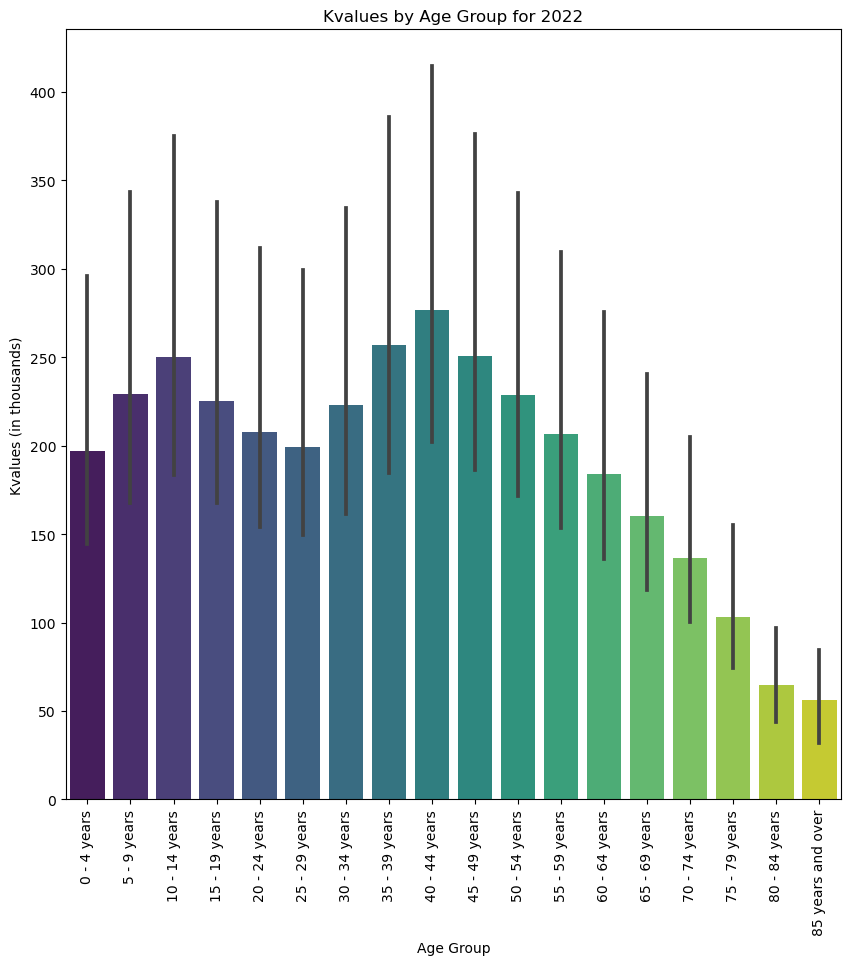

In [42]:

# Filter the DataFrame for the year 2022
df_2022 = df[(df['year'] == 2022) & (df['age_group'].isin(five_year_age_intervals))]

# Plotting the kvalues for each age_group in 2022
plt.figure(figsize=(10, 10))  # Adjust the width and height as needed
sns.barplot(data=df_2022, x='age_group', y='kvalue',palette='viridis' )
# 
# Add title and labels
plt.title('Kvalues by Age Group for 2022')
plt.xlabel('Age Group')
plt.ylabel('Kvalues (in thousands)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Save the plot 
plt.savefig('../images/05_mece')

# Show the plot
plt.show()


In [43]:
# Define the years for which you want to generate charts
years = list(range(1950, 2021, 10)) + [2021, 2022]
years

[1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, 2021, 2022]

In [44]:


# Define the years for which you want to generate charts
years = list(range(1950, 2021, 10)) + [2021, 2022, 2023]


for year in years:
    # Filter the DataFrame for the specific year, age group, and gender
    yearly_df = df[(df['year'] == year) & 
                   (df['gender'] == 'Both sexes')&
                   (df['age_group'].isin(five_year_age_intervals))]

    # Check if the DataFrame is not empty
    if not yearly_df.empty:
        # Create the chart for the specific year
        chart = alt.Chart(yearly_df).mark_bar().encode(
            x=alt.X('age_group:N', sort=five_year_age_intervals),
            y=alt.Y('kvalue:Q', title='Values (in thousands)'),
            color='age_group:N'
        ).properties(
            title=f'Population by Age Group in {year}'
        )

        # Save the chart as an image
        chart.save(f'../images/population_{year}.png')


In [45]:
# Filtering the dataframe to include only the specified age groups
filtered_df = df[df['age_group'].isin(five_year_age_intervals)]

# Create an interactive slider for selecting years.
# The slider ranges from 1950 to 2023 with a step of 1 year.
input_slider = alt.binding_range(min=1950, max=2023, step=1)
slider_selection = alt.selection_single(bind=input_slider, fields=['year'], name="Year")

# Define the order of age groups to be used in the chart.
# This ensures that the age groups are displayed in a logical sequence.
age_group_order = [
    '0 - 4 years', '5 - 9 years', '10 - 14 years', '15 - 19 years', 
    '20 - 24 years', '25 - 29 years', '30 - 34 years', '35 - 39 years', 
    '40 - 44 years', '45 - 49 years', '50 - 54 years', '55 - 59 years', 
    '60 - 64 years', '65 - 69 years', '70 - 74 years', '75 - 79 years', 
    '80 - 84 years', '85 years and over'
]

# Create the chart using Altair
chart = alt.Chart(filtered_df).mark_bar().encode(
    x=alt.X('age_group:N', sort=age_group_order),  # Apply custom sorting to the x-axis based on age groups
    y='kvalue:Q',  # Quantitative value for the y-axis
    tooltip=['year', 'age_group', 'kvalue'],  # Tooltip information on hover
    color='age_group:N'  # Color encoding by age group
).add_selection(
    slider_selection  # Add the year slider to the chart
).transform_filter(
    slider_selection  # Filter the data based on the selected year from the slider
)

# Display the chart
chart.display()


alt.Chart(...)

In [46]:
# Unique values in non-numeric columns
{col: df[col].unique() for col in df.select_dtypes(include='object').columns}

{'age_group': array(['0 - 4 years', '0 - 14 years', '5 - 9 years', '10 - 14 years',
        '15 - 19 years', '15 - 24 years', '15 years and over',
        '20 - 24 years', '25 - 29 years', '25 - 44 years', '30 - 34 years',
        '35 - 39 years', '40 - 44 years', '45 - 49 years', '45 - 64 years',
        '50 - 54 years', '55 - 59 years', '60 - 64 years', '65 - 69 years',
        '65 years and over', '70 - 74 years', '75 - 79 years',
        '80 - 84 years', '85 years and over', 'All ages'], dtype=object),
 'gender': array(['Both sexes', 'Male', 'Female'], dtype=object)}


filter the DataFrame for the 'All ages' category and then plot the values against the 'Age Groups'.

### Population Trends
- The line chart from 1950 to 2023 shows a minimum in 1961 of 2,818,300 and a monotonic increase since surpassing 5.2 million between 2022 and 2023.

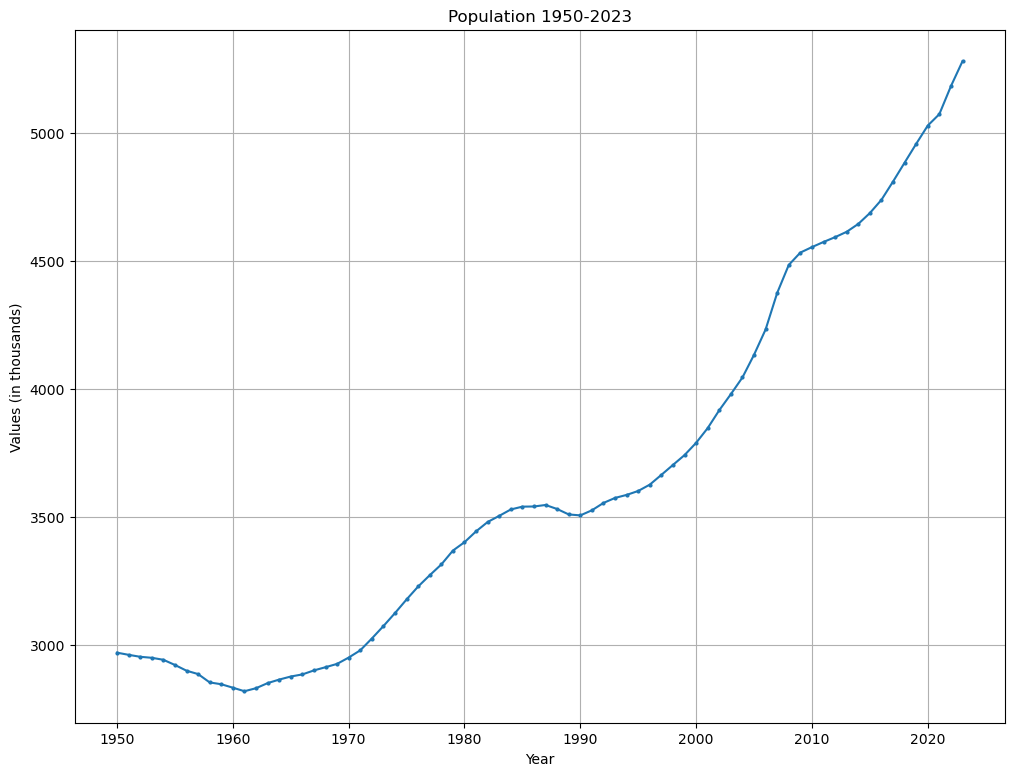

The line chart shown traces out the population from 1950 to 2023, showing a general increase since the minimum  population of of 2,818,300  in 1961. The population rose to just below 5.3 million in 2023 when the  usual resident estimate was 5,281,600. 


In [47]:


# Filter the DataFrame for 'All ages' and 'Both sexes'
df_both_sexes_all_ages = df[(df.age_group == 'All ages') & (df.gender == 'Both sexes')]

# Plotting kvalues for 'All ages' across all years as a line graph
plt.figure(figsize=(12, 9))
plt.plot(df_both_sexes_all_ages.year, df_both_sexes_all_ages.kvalue, marker='o',markersize=2)  # Using dot notation


# Adding gridlines for better readability
plt.grid(True)


# Adding title and labels
plt.title('Population 1950-2023')
plt.xlabel('Year')
plt.ylabel('Values (in thousands)')

# Save the plot 
plt.savefig('../images/06_pop_total_trend')


# Show the plot
plt.show()

print('The line chart shown traces out the population from 1950 to 2023, showing a general increase since the minimum  population of of 2,818,300  in 1961. The population rose to just below 5.3 million in 2023 when the  usual resident estimate was 5,281,600. ')


In [48]:
# Filter the DataFrame for 'All ages' and 'Both sexes'
df_all_ages_both_sexes = df[(df['age_group'] == 'All ages') & (df['gender'] == 'Both sexes')]

# Find the max and min of 'kvalue'
max_kvalue = df_all_ages_both_sexes['kvalue'].max()
min_kvalue = df_all_ages_both_sexes['kvalue'].min()

max_kvalue, min_kvalue

(5281.6, 2818.3)

In [49]:

# Filter for 'All ages' and 'Both sexes'
df_both_sexes_all_ages = df[(df['age_group'] == 'All ages') & (df['gender'] == 'Both sexes')]

# Calculate the percentage growth compared to the previous year
growth = df_both_sexes_all_ages['kvalue'].pct_change() * 100


In [50]:
growth.describe()

count    73.000000
mean      0.795815
std       0.863756
min      -1.129865
25%       0.330153
50%       0.713470
75%       1.504346
max       3.375936
Name: kvalue, dtype: float64

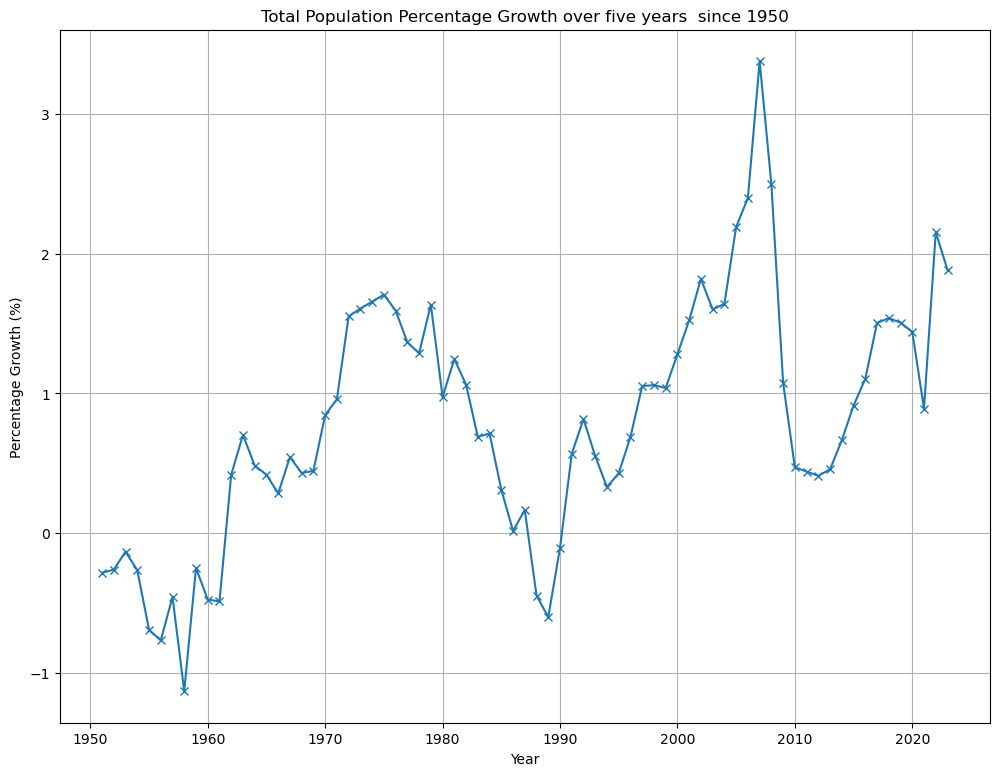

Total Population Percentage Growth over five years  since 1950


In [51]:

# Plotting percentage growth
plt.figure(figsize=(12, 9))
plt.plot(df_both_sexes_all_ages.year, growth, marker='x')

# Adding title and labels
plt.title('Total Population Percentage Growth over five years  since 1950')
plt.xlabel('Year')
plt.ylabel('Percentage Growth (%)')



plt.grid(True)
# Save the plot 
plt.savefig('../images/07_pop_percentage_trend')

# Show the plot
plt.show()

print('Total Population Percentage Growth over five years  since 1950')


In [52]:
year_pivot_age_gender = df.pivot_table(index='year', columns=['age_group', 'gender'], values='kvalue')
year_pivot_age_gender.to_csv('../data/03_pop_year_pivot_age_gender.csv', index=True)  # Assuming the directory structure is correct
year_pivot_age_gender.head()


age_group 0 - 14 years               0 - 4 years               10 - 14 years  \
gender      Both sexes Female   Male  Both sexes Female   Male    Both sexes   
year                                                                           
1950             851.2  416.6  434.6       310.2  151.3  158.9         262.1   
1951             854.8  418.4  436.4       312.9  152.6  160.0         260.9   
1952             859.6  420.8  438.8       310.3  151.6  158.7         264.6   
1953             865.3  423.4  441.9       308.2  150.7  157.5         268.6   
1954             870.0  425.6  444.4       305.9  149.7  156.2         272.1   

age_group               15 - 19 years  ... 75 - 79 years 80 - 84 years         \
gender    Female   Male    Both sexes  ...          Male    Both sexes Female   
year                                   ...                                      
1950       128.7  133.4         244.0  ...          31.4          30.1   15.9   
1951       128.2  132.7         241.2  ...          31.6          30.9   16.2   
1952       130.0  134.6         239.7  ...          31.8          31.3   16.5   
1953       131.9  136.7         238.6  ...          32.1          31.6   16.7   
1954       133.6  138.5         237.1  ...          32.3          32.1   17.0   

age_group       85 years and over               All ages                  
gender     Male        Both sexes Female Male Both sexes  Female    Male  
year                                                                      
1950       14.2              13.3    7.8  5.5     2969.0  1459.0  1510.0  
1951       14.6              13.3    7.8  5.5     2960.6  1454.0  1506.6  
1952       14.8              14.0    8.1  5.9     2952.9  1452.0  1500.9  
1953       14.9              14.5    8.3  6.2     2949.0  1451.1  1497.9  
1954       15.1              15.1    8.5  6.6     2941.2  1448.2  1493.0  

[5 rows x 75 columns]

In [53]:
year_gender_pivot_age = df.pivot_table(index=['year', 'gender'], columns='age_group', values='kvalue')
year_gender_pivot_age.to_csv('../data/04_pop_year_gender_pivot_age.csv', index=True)
year_gender_pivot_age.head()

age_group        0 - 14 years  0 - 4 years  10 - 14 years  15 - 19 years  \
year gender                                                                
1950 Both sexes         851.2        310.2          262.1          244.0   
     Female             416.6        151.3          128.7          117.4   
     Male               434.6        158.9          133.4          126.6   
1951 Both sexes         854.8        312.9          260.9          241.2   
     Female             418.4        152.6          128.2          115.4   

age_group        15 - 24 years  15 years and over  20 - 24 years  \
year gender                                                        
1950 Both sexes          452.6             2117.8          208.6   
     Female              217.7             1042.4          100.3   
     Male                234.9             1075.4          108.3   
1951 Both sexes          443.4             2105.8          202.2   
     Female              212.2             1035.6           96.8   

age_group        25 - 29 years  25 - 44 years  30 - 34 years  ...  \
year gender                                                   ...   
1950 Both sexes          201.1          773.6          194.8  ...   
     Female              100.2          380.2           96.5  ...   
     Male                100.9          393.4           98.3  ...   
1951 Both sexes          198.4          771.2          191.6  ...   
     Female               98.8          378.9           95.1  ...   

age_group        50 - 54 years  55 - 59 years  60 - 64 years  65 - 69 years  \
year gender                                                                   
1950 Both sexes          158.4          130.4          121.9          109.3   
     Female               77.8           64.6           60.6           54.1   
     Male                 80.6           65.8           61.3           55.2   
1951 Both sexes          163.0          128.8          122.1          107.5   
     Female               80.1           63.8           60.7           53.4   

age_group        65 years and over  70 - 74 years  75 - 79 years  \
year gender                                                        
1950 Both sexes              317.1          100.4           64.0   
     Female                  161.3           50.9           32.6   
     Male                    155.8           49.5           31.4   
1951 Both sexes              316.4          100.1           64.6   
     Female                  161.4           51.0           32.9   

age_group        80 - 84 years  85 years and over  All ages  
year gender                                                  
1950 Both sexes           30.1               13.3    2969.0  
     Female               15.9                7.8    1459.0  
     Male                 14.2                5.5    1510.0  
1951 Both sexes           30.9               13.3    2960.6  
     Female               16.2                7.8    1454.0  

[5 rows x 25 columns]

In [54]:
# Filter the DataFrame for 'Both sexes'
df_both_sexes = df[df['gender'] == 'Both sexes']

# Pivot the data on 'age_group' and 'year'
df_all_age = df_both_sexes.pivot_table(index='year', columns='age_group', values='kvalue')

# Save the pivoted DataFrame to a CSV file
df_all_age.to_csv('../data/05_pop_all_age.csv', index=True)
# Display the first few rows of the pivoted DataFrame
df_all_age.head()

age_group,0 - 14 years,0 - 4 years,10 - 14 years,15 - 19 years,15 - 24 years,15 years and over,20 - 24 years,25 - 29 years,25 - 44 years,30 - 34 years,...,50 - 54 years,55 - 59 years,60 - 64 years,65 - 69 years,65 years and over,70 - 74 years,75 - 79 years,80 - 84 years,85 years and over,All ages
year,,,,,,,,,,,,,,,,,,,,,
1950,851.2,310.2,262.1,244.0,452.6,2117.8,208.6,201.1,773.6,194.8,...,158.4,130.4,121.9,109.3,317.1,100.4,64.0,30.1,13.3,2969.0
1951,854.8,312.9,260.9,241.2,443.4,2105.8,202.2,198.4,771.2,191.6,...,163.0,128.8,122.1,107.5,316.4,100.1,64.6,30.9,13.3,2960.6
1952,859.6,310.3,264.6,239.7,437.5,2093.3,197.8,192.9,760.3,188.6,...,160.0,133.8,121.2,107.9,316.9,98.8,64.9,31.3,14.0,2952.9
1953,865.3,308.2,268.6,238.6,432.3,2083.7,193.7,187.7,750.6,185.8,...,157.3,138.8,120.5,108.6,317.8,97.7,65.4,31.6,14.5,2949.0
1954,870.0,305.9,272.1,237.1,426.5,2071.2,189.4,182.2,739.7,182.8,...,154.4,143.6,119.7,109.0,318.3,96.3,65.8,32.1,15.1,2941.2


In [55]:
# Filtering to  meme DATA only
df_meme = df[df['age_group'].isin(five_year_age_intervals)]

# Filter the DataFrame for 'Both sexes'
df_both_sexes = df_meme[df_meme['gender'] == 'Both sexes']

# Pivot the data on 'age_group' and 'year'
df_meme_age = df_both_sexes.pivot_table(index='year', columns='age_group', values='kvalue')

# Save the pivoted DataFrame to a CSV file
df_meme_age.to_csv('../data/06_pop_mece_age_gender.csv', index=True)
# Display the first few rows of the pivoted DataFrame
df_meme_age.head()

age_group,0 - 4 years,10 - 14 years,15 - 19 years,20 - 24 years,25 - 29 years,30 - 34 years,35 - 39 years,40 - 44 years,45 - 49 years,5 - 9 years,50 - 54 years,55 - 59 years,60 - 64 years,65 - 69 years,70 - 74 years,75 - 79 years,80 - 84 years,85 years and over
year,,,,,,,,,,,,,,,,,,
1950,310.2,262.1,244.0,208.6,201.1,194.8,199.8,177.9,163.8,278.9,158.4,130.4,121.9,109.3,100.4,64.0,30.1,13.3
1951,312.9,260.9,241.2,202.2,198.4,191.6,200.9,180.3,160.9,281.0,163.0,128.8,122.1,107.5,100.1,64.6,30.9,13.3
1952,310.3,264.6,239.7,197.8,192.9,188.6,197.3,181.5,163.6,284.7,160.0,133.8,121.2,107.9,98.8,64.9,31.3,14.0
1953,308.2,268.6,238.6,193.7,187.7,185.8,194.1,183.0,166.4,288.5,157.3,138.8,120.5,108.6,97.7,65.4,31.6,14.5
1954,305.9,272.1,237.1,189.4,182.2,182.8,190.6,184.1,169.0,292.0,154.4,143.6,119.7,109.0,96.3,65.8,32.1,15.1


### Future Projections
Population projections will be predicted based on commensurate  mortality, fertility, and migration figures that are part of the [Central Statistics Office in Ireland  population of Ireland series.](https://data.cso.ie/product/pme)